# Polynomial Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

## Importing the dataset

In [2]:
data = pd.read_csv('Data.csv')

## Analyze data

In [3]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
data.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


### Visualizing the  data

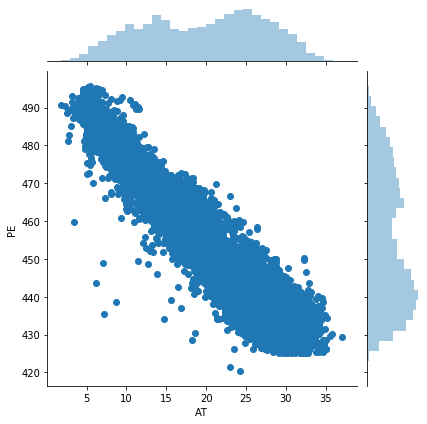

In [9]:
sns.jointplot(x='AT',y='PE',data=data)

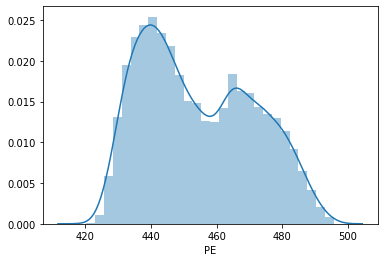

In [10]:
sns.distplot(data['PE'])

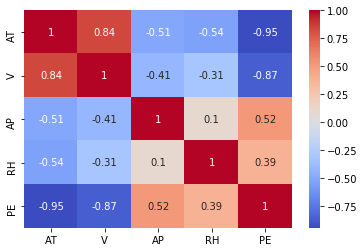

In [11]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

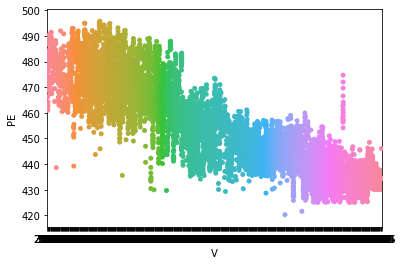

In [12]:
sns.swarmplot(x='V',y='PE',data=data)

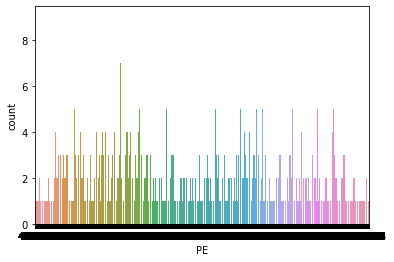

In [13]:
sns.countplot(data['PE'])

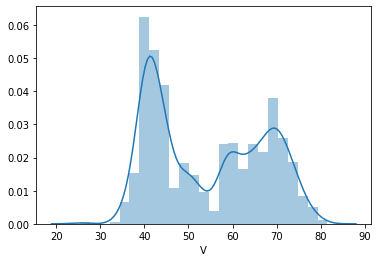

In [14]:
sns.distplot(data['V'])

### Cleaning data

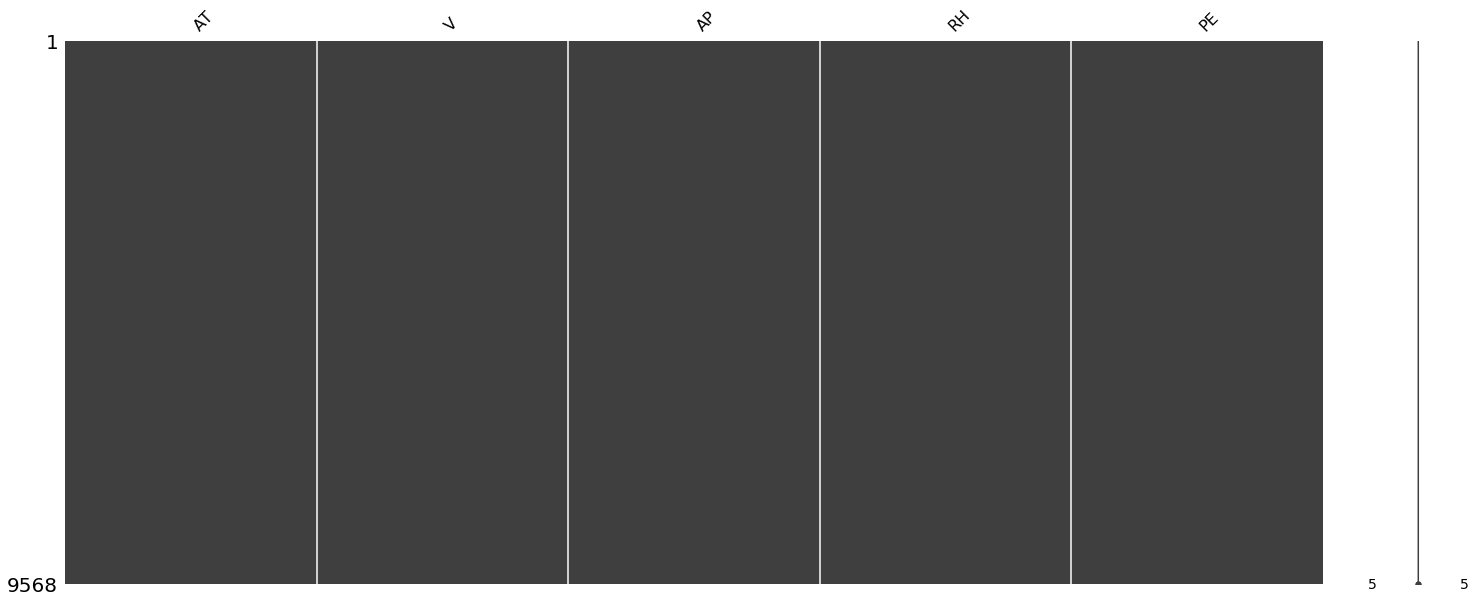

In [15]:
ms.matrix(data)

### Categorical Conversion

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [18]:
x = data.drop('PE',axis=1)
y = data['PE']

### Splitting the data into train and test datasets

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test , Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=0)

## Training the Polynomial Regression model

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
polynomialFeature = PolynomialFeatures(degree=4)

In [23]:
X_poly = polynomialFeature.fit_transform(X_train)

In [24]:
print(X_poly)

[[1.00000000e+00 1.58300000e+01 4.16700000e+01 ... 5.64188267e+09
  4.12650947e+08 3.01815572e+07]
 [1.00000000e+00 2.25600000e+01 6.22600000e+01 ... 4.08638870e+09
  2.55008161e+08 1.59136018e+07]
 [1.00000000e+00 2.21100000e+01 5.98000000e+01 ... 5.08690762e+09
  3.50879866e+08 2.42026570e+07]
 ...
 [1.00000000e+00 1.68100000e+01 3.85200000e+01 ... 5.86500714e+09
  4.33197009e+08 3.19964912e+07]
 [1.00000000e+00 1.28000000e+01 4.11600000e+01 ... 7.76570573e+09
  6.54642544e+08 5.51858229e+07]
 [1.00000000e+00 3.23200000e+01 6.79000000e+01 ... 1.45623249e+09
  5.49010997e+07 2.06981424e+06]]


In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the test dataset 

In [27]:
Y_pred_test = regressor.predict(polynomialFeature.transform(X_test))

### Results

In [28]:
Y_test = np.array(Y_test)
Y_pred_test = np.array(Y_pred_test)

In [29]:
np.set_printoptions(precision=2)
print(np.concatenate((Y_test.reshape(len(Y_test),1),Y_pred_test.reshape(len(Y_pred_test),1)),1))

[[431.23 434.16]
 [460.01 457.96]
 [461.14 460.65]
 ...
 [426.86 435.23]
 [433.4  436.56]
 [441.94 438.67]]


## Predicting a new result with Polynomial Regression

In [30]:
print(x)

         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


In [31]:
regressor.predict(polynomialFeature.fit_transform([[14.96,41.76,1024.07,73.17]]))

array([466.19])

### Intercept and Coefficients

In [32]:
regressor.intercept_

91624.33431653201

In [33]:
regressor.coef_

array([-2.79e-03, -8.12e-02, -3.30e-01,  6.50e-02, -2.39e-01, -7.26e+01,
       -1.62e+02,  1.37e+01, -6.64e+01,  1.16e+02, -9.27e+00, -3.67e-01,
       -3.83e-01, -2.16e-01,  5.53e+00, -2.98e-01,  7.59e-01,  1.30e-01,
       -8.79e-02, -1.99e-01,  3.01e-01,  1.58e-01, -2.65e-02,  1.35e-01,
       -4.87e-02, -7.44e-05, -2.23e-01, -1.03e-02,  1.84e-02, -5.72e-03,
        2.71e-02,  4.01e-04,  4.79e-04, -1.02e-02, -3.94e-03, -1.26e-04,
        4.13e-05,  2.97e-04,  3.67e-05, -7.71e-05, -7.39e-04, -3.36e-05,
       -5.72e-05,  8.07e-05,  2.52e-05,  7.99e-06,  1.98e-04, -2.45e-05,
       -1.39e-04, -1.48e-04, -1.11e-05,  1.28e-05, -6.85e-05,  4.41e-05,
        1.54e-05,  1.69e-06,  1.45e-07,  1.99e-06,  1.07e-04,  9.98e-06,
       -4.09e-07, -9.12e-06,  5.95e-06, -2.69e-05,  2.33e-06, -1.09e-07,
       -2.69e-07,  4.82e-06,  2.84e-06,  2.07e-06])

### R-squared score 

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(Y_test,Y_pred_test)

0.9443659071305317